<a href="https://colab.research.google.com/github/cbsobral/ml-fies/blob/main/Module00_LoadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 00 - Loading data and creating training and test sets

In this first module, we perform the following steps:

1. Load the data from Google Drive in two parts (the file is too big to load at once);
2. Exclude irrelevant variables or variables with too many missing values;
3. Rename variables in English and possibly with shorter names;
4. Divide training and test set.

### 1 - Load the data in two parts:

In [10]:
import pandas as pd

url_a = "https://drive.google.com/file/d/1prPbFSiXFTHmTHzXTGxy4HrtRxXUHhce/view?usp=sharing"
path_a = "https://drive.google.com/uc?export=download&id="+url_a.split("/")[-2]
base_df_a = pd.read_excel(path_a)
base_df_a.shape

(309999, 37)

In [ ]:
url_b = "https://drive.google.com/file/d/1nGckSszPPifPvR3o5FeYaKArUYbfjHGn/view?usp=sharing"
path_b = "https://drive.google.com/uc?export=download&id="+url_b.split("/")[-2]
base_df_b = pd.read_excel(path_b)
base_df_b.shape

(327823, 37)

In [23]:
complete_set = base_df_a.append(base_df_b)
complete_set.shape

(637822, 37)

### 2 - Renaming variables

In [ ]:
#Let"s use 365 days as the initial limit for default categories
#To be added in the pipeline
#complete_set=complete_set.assign(default=1*(complete_set["nu_dias_atraso"]>365))

In [24]:
new_names ={"NU_ANO_SEMESTRE_INSCRICAO":"semester_enroll",
            "SG_SEXO":"gender",
            "DS_OCUPACAO":"occupation",
            "DS_RACA_COR" : "ethnicity",
            "NU_ANO_CONCLUSAO_ENSINO_MEDIO":"high_school_endyear",
            "SG_UF_CURSO": "state_course",
            "QT_SEMESTRES_CURSO": "n_sem_course",
            "VL_SEMESTRE_COM_DESCONTO": "tuition_discounted",
            "NU_PERCENT_SOLICITADO_FINANC":"perc_requested",
            "VL_FINANC_RECURSO_ALUNO":"student_resource",
            "nu_dias_atraso":"days_delay",
            "ANO_NASC":"birth_year",
            "DS_ESTADO_CIVIL":"marital_status", 
            "VL_RENDA_PESSOAL_BRUTA_MENSAL": "personal_income",
            "VL_RENDA_FAMILIAR_BRUTA_MENSAL": "family_income",
            "ST_ENSINO_MEDIO_ESCOLA_PUBLICA": "public_hs",
            "NO_CURSO": "degree",
            "QT_SEMESTRE_CONCLUIDO": "n_completed_sem",
            "VL_SEMESTRE_ATUAL": "tuition_current",
            "VL_FINANCIADO_SEMESTRE": "loan_value_sem",
            "fase_contrato": "contract_phase",
            "vl_divida": "total_debt",            
            "VL_AVALIACAO_IGC": "igc",
            "VL_FAIXA_CPC": "cpc",
            "VL_FAIXA_CC": "cc",
            "QT_SEMESTRE_FINANCIAMENTO": "sem_funded",
            "QT_MEMBRO": "fam_size",
            "VL_RENDA_PER_CAPITA":"income_pc",
            "NU_PERCENTUAL_COMPROMETIMENTO":"inc_prop",
            "VL_TOTAL_FINANCIAMENTO":"loan_value",
            "VL_LIMITE_GLOBAL":"loan_limit",
            "dt_inicio_cont":"date_contract"
}

complete_set = complete_set.rename(index=str, columns=new_names)
complete_set.dtypes

semester_enroll                            int64
gender                                    object
occupation                                object
marital_status                            object
family_income                            float64
personal_income                          float64
NO_MUNICIPIO                              object
SG_UF                                     object
ethnicity                                 object
public_hs                                 object
high_school_endyear                      float64
NU_SEMESTRE_REFERENCIA                     int64
state_course                              object
degree                                    object
igc                                      float64
cpc                                      float64
cc                                       float64
n_sem_course                               int64
n_completed_sem                            int64
sem_funded                                 int64
QT_MESES_FINANC_SEME

In [36]:
import numpy as np
# Calculate values for wrong entries (larger than 300,000 reais)
complete_set['loan_value_sem'] = np.where((complete_set.loan_value_sem > 300000), (complete_set["perc_requested"]/100 * complete_set["tuition_current"]), complete_set.loan_value_sem)
complete_set['loan_value_sem'].describe() # seems to work

count   637822.00
mean      5241.23
std       3811.32
min        300.00
25%       3360.00
50%       4607.88
75%       5899.00
max      41499.90
Name: loan_value_sem, dtype: float64


# Bruno's variables which need special treatment

In [ ]:
complete_set.nlargest(20, ['family_income'])
# na tabela abaixo, eu relaciono as 20 maiores rendas familiares do banco de dados
# os 6 primeiros valores são outliers e os 3 primeiros parecem ser erros
# se isso for renda familiar mensal, eu sugiro excluir valores maiores que 100,000.00, o que acham?

# Diego: além desse problema em family income, temos que imputar NAs para high_school_endyear e birth_year

### 3 - Cleaning Dataset

In [ ]:
import datetime as dt

variables_to_drop = ["NO_MUNICIPIO",
                     "SG_UF",
                     "VL_SEMESTRE_SEM_DESCONTO",
                     "NU_SEMESTRE_REFERENCIA"]

complete_set_clean = complete_set.drop(variables_to_drop, axis = 1)

complete_set_clean["date_contract"]= complete_set_clean["date_contract"].map(dt.datetime.toordinal)

Some variables are better interprerted as categories.

### 4 - Add atributes

Adds a columns for a dummy that defines if the main occupation is student. An another one to define if the delay in repayment is more than one year (365 days)

In [ ]:
#Recode ocupacao
complete_set_clean=complete_set_clean.assign(student=1*(complete_set["occupation"]=="Estudante"))

complete_set_clean=complete_set_clean.assign(default=1*(complete_set["days_delay"]>=365))

In [ ]:
#Here are the columns we want to drop NA's and not treat like using median, or something else
complete_set_clean = complete_set_clean.dropna(subset=["semester_enroll",
                                                       "gender",
                                                       "occupation",
                                                       "marital_status",
                                                       "ethnicity",
                                                       "public_hs",
                                                       "state_course",
                                                       "degree",
                                                       "igc","cpc","cc",
                                                       "contract_phase",
                                                       "birth_year"])

In [ ]:
#Birth year has to be corrected in the excel file

complete_set_clean = complete_set_clean.astype({"semester_enroll":str,
                                                "igc":'int64',"cpc":'int64',"cc":'int64',
                                               "birth_year":str
                                               })

In [ ]:
#Get only categorical


complete_set_cat = complete_set_clean.select_dtypes(include=["object"])

### Pipeline

Functions that will be used to tranform our dataset

In [ ]:
#Imputes the medians to NA's for numeric values 
#from sklearn.impute import SimpleImputer

#num_imputer = SimpleImputer(strategy="median")
#ord_imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ("num_imputer", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])

#complete_num_tr = num_pipeline.fit_transform(complete_set_num)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

ord_pipeline = Pipeline([
        ("ord_imputer", SimpleImputer(strategy="most_frequent")),
        ("ord_encoder", OrdinalEncoder()),
    ])

#complete_num_tr = num_pipeline.fit_transform(complete_set_num)

In [ ]:
ord_attribs = ['igc','cpc','cc','date_contract']

num_attribs = ['family_income',
               'personal_income',
               'high_school_endyear',
               'n_sem_course',
               'n_completed_sem',
               'sem_funded',
               'QT_MESES_FINANC_SEMESTRE_ATUAL',
               'fam_size',
               'income_pc',
               'tuition_discounted',
               'tuition_current',
               'inc_prop',
               'perc_requested',
               'loan_value_sem',
               'student_resource',
               'loan_value',
               'loan_limit',
               'days_delay',
               'total_debt']    

cat_attribs = ['semester_enroll',
               'gender',
               'occupation', 
               'marital_status',
               'ethnicity', 'public_hs', 'state_course', 'degree', 'contract_phase',
               'birth_year'
              ]

In [ ]:
#Full pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder




#num_attribs = list(complete_set_num)
#cat_attribs = list(complete_set_cat)

full_pipeline = ColumnTransformer([
       ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("ord", ord_pipeline,ord_attribs)
])

In [ ]:
complete_set_prepared = full_pipeline.fit_transform(complete_set_clean)

In [ ]:
complete_set_prepared[:1]

<1x536 sparse matrix of type '<class 'numpy.float64'>'
	with 32 stored elements in Compressed Sparse Row format>

### 4 - Creating a training and a test set

In this section we will create the training and test set using the function *train_test_split* from Scikit-Learn. Two important considerations about our choice:

* Our dataset is a sample provided by the Brazilian Governent and will not be updated. Therefore, we chose not to be concerned about future splits with updated data;

* Our data includes 637,822 instances. We assume it is big enough and do not employ stratified sampling.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(complete_set_prepared, test_size=0.2, random_state=42)

### 5 - Cleaning Data 

### 6 - Visualisation

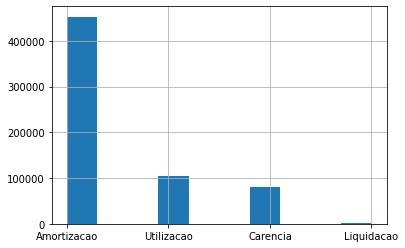

In [ ]:
complete_set["contract_phase"].hist()

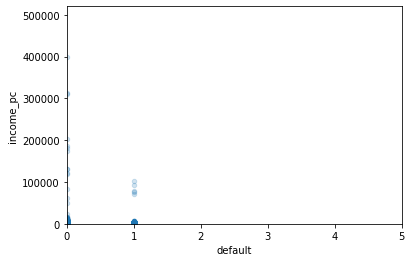

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

complete_set.plot(kind="scatter", x="default", y="income_pc",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()